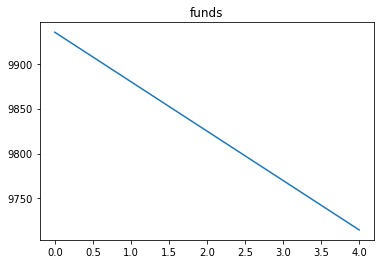

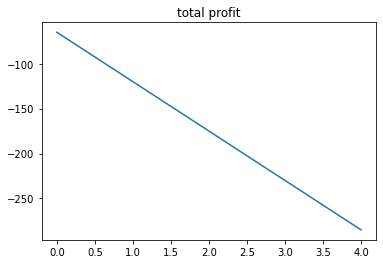

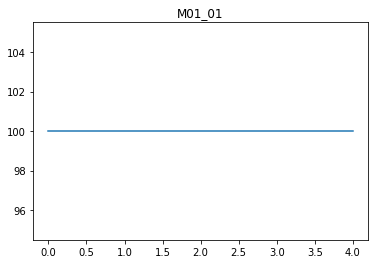

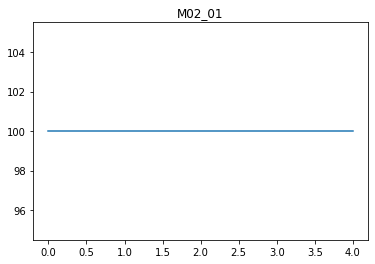

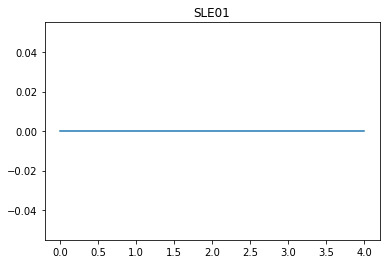

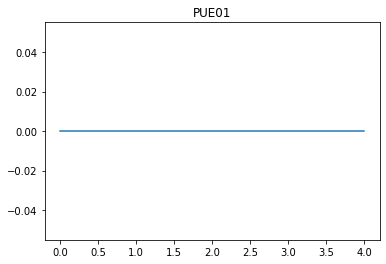

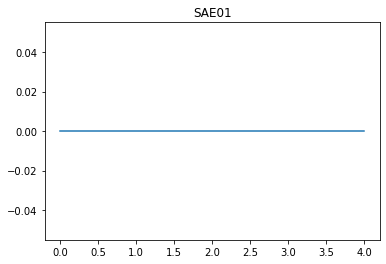

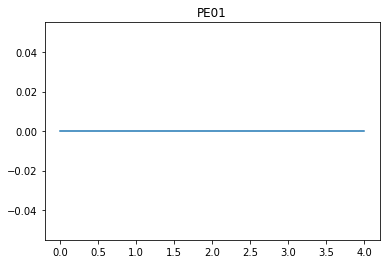

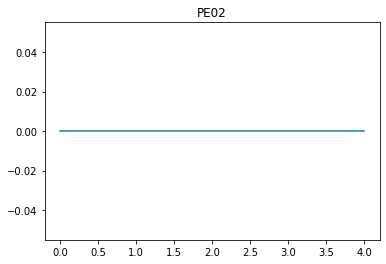

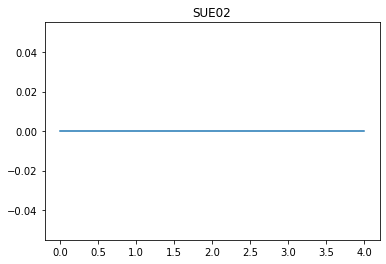

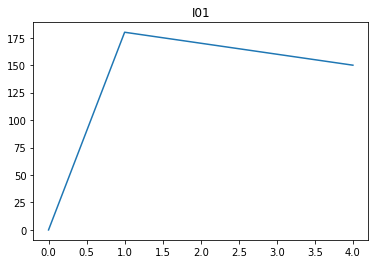

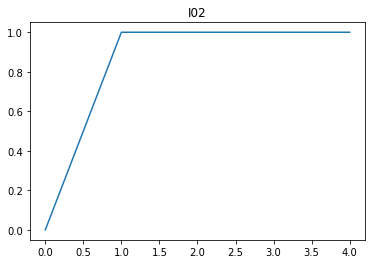

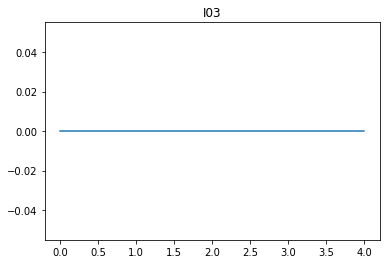

In [41]:
PORT = 8000

import requests

import time
import matplotlib.pyplot as plt
from IPython.display import clear_output


# Make a request to create a new simulation
def init():
    url = f'http://127.0.0.1:{PORT}/control/poll/create_from_example/sim1'
    response = requests.post(url)
    if response.status_code == requests.codes.ok:
        jresponse = response.json()
        

# Make a request to run one step
def next_step():
    url = f'http://127.0.0.1:{PORT}/control/poll/run_one_step'
    response = requests.post(url)
    if response.status_code == requests.codes.ok:
        jresponse = response.json()
        print(f"Next Step")

# Make a request to get the current funds available
def get_next_point():
    url = f'http://127.0.0.1:{PORT}/enterprise/poll/inventory'
    response = requests.get(url)
    if response.status_code == requests.codes.ok:
        jresponse = response.json()
        print(f"Funds : {jresponse['funds_in_eur']}")
        return jresponse['funds_in_eur']
    else:
        return None

# Make a request to get the status of every machine
def get_status_machines():
    url = f'http://127.0.0.1:{PORT}/enterprise/poll/machine'
    response = requests.get(url)
    jresponse = response.json()
    machines = []

    for i in range (len(jresponse)):
        machines.append((jresponse[i]['name'],jresponse[i]['operating_efficiency_percentage']))
    return machines

#Make a request to get the health of every employee
def get_employee_health():
    url = f'http://127.0.0.1:{PORT}/enterprise/poll/employee'
    response = requests.get(url)
    jresponse = response.json()
    employee = []
    for i in range (len(jresponse)):
        employee.append((jresponse[i]['name'],jresponse[i]['remaining_sickness_in_hours_worked']))
    return employee

#Make a request to get contents of inventory per type of item
def get_inventory():
    url = f'http://127.0.0.1:{PORT}/enterprise/poll/inventory'
    response = requests.get(url)
    jresponse = response.json()
    item_quantities = []
    for i in range (len(jresponse['item_quantities'])):
        item_quantities.append((jresponse['item_quantities'][i]['item']['name'],jresponse['item_quantities'][i]['quantity']))
    return item_quantities

# List holding the x values
data_x = []
# List holding the y values
data_y = []
# List holding the machine status
machines = []
# List holding the employee status
employees = []
# List holding item quantities
item_quantities = []
#List holding profits
profits=[]
# Create sim
init()
#Initial funds
url = f'http://127.0.0.1:{PORT}/enterprise/poll/inventory'
response = requests.get(url)
jresponse = response.json()
initial_funds=jresponse['funds_in_eur']

for x in range(0, 5):
    next_step() # Do one step
    y = get_next_point() # Request a new random value and store in y
    m = get_status_machines()
    e = get_employee_health()
    it = get_inventory()
    machines.append(m)
    employees.append(e)
    item_quantities.append(it)
    profits.append(y-initial_funds)
    data_x.append(x)  # Add the current x to the list
    data_y.append(y) # Add the current y to the list
    clear_output(wait=True) # Clear / remove whatever was already plotted before
    plt.figure(211)
    plt.plot(data_x, data_y)
    plt.title("funds")# Re-plot the data with the new added values in the list
    plt.figure(212)
    plt.plot(data_x, profits)
    plt.title("total profit")
    for i in range (len(m)): #Plot machine status
        plt.figure()
        data = []
        for j in range (len(machines)):
            data.append(machines[j][i][1])
        plt.plot(data_x,data)
        plt.title(m[i][0])
    for i in range (len(e)): #Plot employee health
        plt.figure()
        data=[]
        for j in range (len(employees)):
            data.append(employees[j][i][1])
        plt.plot(data_x,data)
        plt.title(e[i][0])
    for i in range (len(it)): #Plot item quantities
        plt.figure()
        data=[]
        for j in range (len(item_quantities)):
            if len(item_quantities[j])<len(it):
                data.append(0)
            else :
                data.append(item_quantities[j][i][1])
        plt.plot(data_x,data)
        plt.title(it[i][0])
    plt.show() # Make sure to display the new plot, to make it visible
    
 # Wait 0.1 seconds before the next request



In [6]:
url = f'http://127.0.0.1:{PORT}/enterprise/poll/inventory'
response = requests.get(url)

In [7]:
print(response.json())

{'type_name': 'Inventory', 'item_quantities': [{'type_name': 'ItemQuantity', 'item': {'name': 'I01', 'type_name': 'Item', 'unit': 'kg'}, 'quantity': 103.5}, {'type_name': 'ItemQuantity', 'item': {'name': 'I02', 'type_name': 'Item', 'unit': 'kg'}, 'quantity': 4.6499999999999995}, {'type_name': 'ItemQuantity', 'item': {'name': 'I03', 'type_name': 'Item', 'unit': 'kg'}, 'quantity': 0.0}], 'funds_in_eur': 17750.0}


In [4]:
type(response.json())

list

In [15]:
print(get_employee_health())

[('SLE01', 0.0), ('PUE01', 8.0), ('SAE01', 0.0), ('PE01', 0.0), ('PE02', 9.0), ('SUE02', 0.0)]


In [27]:
item_quantities


[[('I01', 190.0), ('I02', 1.0)],
 [('I01', 180.0), ('I02', 1.0), ('I03', 0.0)],
 [('I01', 170.0), ('I02', 1.0), ('I03', 0.0)],
 [('I01', 160.0), ('I02', 1.0), ('I03', 0.0)],
 [('I01', 150.0), ('I02', 1.0), ('I03', 0.0)]]

In [31]:
init()
next_step()

Next Step


In [32]:
get_inventory()

[('I01', 190.0), ('I02', 1.0)]